## Black Friday

Dec 5, 2018

Dataset of 550 000 observations about the black Friday in a retail store, it contains different kinds of variables either numerical or categorical. It contains missing values.

From: @Shamalip on Kaggle

Analyzing Data
- Who attends black friday more, men vs women, married vs unmarried, new to city vs old resident?
- Who is more likely to spend more on black friday? (men vs women, married vs unmarried, new to city vs old resident)
- What kind of products are people more likely to buy on black friday? Does this differ by gender, marital status or residence status?

predictions
- Predict age, gender, amount of purchase based on data

recommendations
- Recommend products based on age, gender, location


In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#import csv file
location = "BlackFriday.csv"
df = pd.read_csv(location)
#preview data
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172
537576,1004737,P00118242,M,36-45,16,C,1,0,5,8.0,NaN,6875


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


we have 12 columns (variables) and 537,577 rows. you can tell there's missing data 

In [5]:
#find the columns that have missing values
df.isnull().sum()


User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

Product_Category_2 and Product_Category_3 have missing data (i.e. have some null values

In [6]:
#drop unnecessary columns 
#df.drop(['User_ID', 'Product_ID'], axis=1)

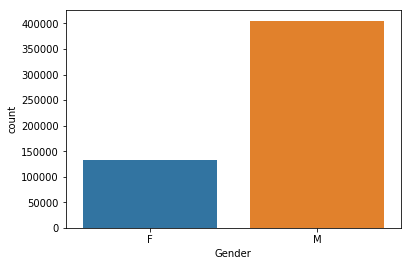

In [7]:
sns.countplot(x='Gender', data=df)

The data shows that significantly more men attendeed black friday than women

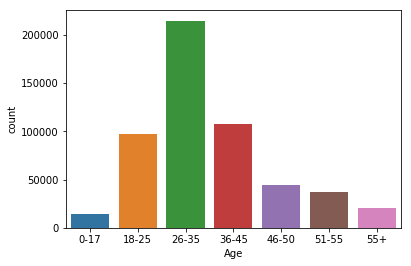

In [12]:
Age_sort_df=df.sort_values('Age')
sns.countplot(x='Age', data=Age_sort_df)


The majority of participants were between the ages of 26-35, followed by 36-45 year olds and 18-25 Year olds

In [ ]:
#sns.countplot(x='Occupation', data=df) #didn't mean much since occupation catagory isn't explained

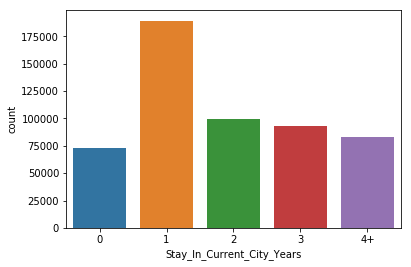

In [11]:
sort_df=df.sort_values('Stay_In_Current_City_Years') #sort by stay in city(ascending order is the default)
sns.countplot(x='Stay_In_Current_City_Years', data=sort_df)
plt.show()

Those who stayed in their current city for 1 year more likely to attend Black Friday

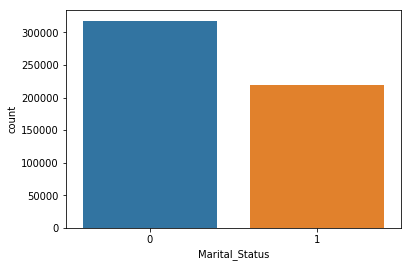

In [13]:
sns.countplot(x='Marital_Status' , data=df)
plt.show()

Unmarried people more likely to attend Black Friday

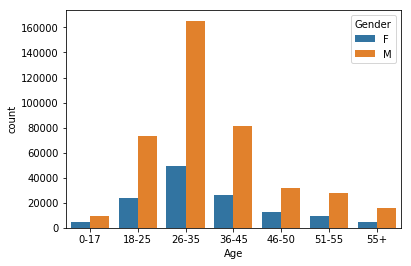

In [14]:
sns.countplot(Age_sort_df['Age'], hue=df['Gender'])
plt.show()

Men between the ages of 26 and 35 were the majority of attendants, followed by men 36-45 years of age and men 18-25 years of age

Now, let's combine gender and marital status to gain more insight

In [15]:
df['Gender_Marital_Status'] = df.apply(lambda x:'%s_%s' % (x['Gender'], x['Marital_Status']), axis=1)

In [16]:
print(df['Gender_Marital_Status']. unique()) #so this gives you Unmarried male and female as well as Married Male and Female

['F_0' 'M_0' 'M_1' 'F_1']


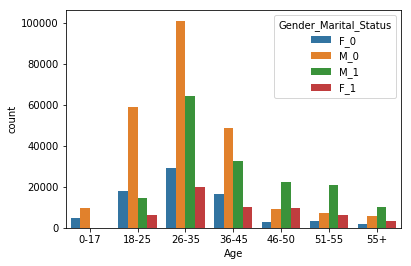

In [17]:
sns.countplot(Age_sort_df['Age'], hue=df['Gender_Marital_Status'])
plt.show()

Unmarried men ages 26-35 shopped more than anyone else. Unmarried men more likely to shop black friday except those over 46 years of age

In [18]:
#discriptive analysis 
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000
